## NowSecure Data Analysis and Visualizations

### 1. Read in the data

In [1]:
# Import necessary packages
import json
import os
import pandas as pd
import numpy as np

# Ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


Set the data path and collect all json files

In [2]:
data_path = "Data"
json_list = [f for f in os.listdir(data_path) if f.endswith('.json')]


Read in the data using the json library
- Create a dataframe that stores the app title, overall score, and tasks/vulnerability

In [3]:
apps_cvss_scores = pd.DataFrame()
for json_file in json_list:
    with open(os.path.join(data_path, json_file)) as json_fd:
        json_obj = json.load(json_fd)
    app_row = {}
    try:
        app_row['App_Title'] = json_obj[0]['title']
        for task in json_obj[0]['assessment']['report']['findings']:
            app_row[task['checkId']] = task['cvss']
        app_row['Score'] = json_obj[0]['assessment']['report']['score']
    except:
        continue
    
    apps_cvss_scores = apps_cvss_scores.append(app_row, ignore_index=True)

apps_cvss_scores = apps_cvss_scores.replace(0.0, np.nan)
apps_cvss_scores


,App_Title,sensitive_data_cert_validation,certificate_validation,world_writable_files_check,world_readable_files_check,apk_weak_crypto_methods,apk_weak_crypto_hashing_algorithms,leaked_logcat_data_gpslatitude,apk_textfield_autocorrect,api_resource_misconfiguration,...,leaked_memdump_data_password,leaked_memdump_data_phonenumber,leaked_memdump_data_serial,leaked_memdump_data_surrounding_wifi_network_bssid,leaked_memdump_data_surrounding_wifi_network_ssid,leaked_memdump_data_surrounding_wifimac,leaked_memdump_data_username,leaked_memdump_data_wifi_ip,leaked_memdump_data_wifi_mac,leaked_memdump_data_zipcode
0,CloudMall - 50% OFF Amazon Prices,7.7,7.0,5.0,4.7,3.7,3.7,3.3,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PGA TOUR Golf Shootout,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Night Owl HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baby Monitor - Babywatcher,NaN,NaN,NaN,4.7,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Logo Maker: Watermark Designer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,NaN,NaN,NaN,NaN,3.7,3.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,AncestryDNA - Genetic Testing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Mighty Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,4x4 Off-Road Rally 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2. Clean the data

Initial cleaning of the data
- Drop rows that don't have a result score
- Drop columns that have no non-null values

In [4]:
apps_cvss_scores = apps_cvss_scores[~apps_cvss_scores['Score'].isnull()]
apps_cvss_scores = apps_cvss_scores.dropna(axis=1, thresh=1)
apps_cvss_scores

,App_Title,sensitive_data_cert_validation,certificate_validation,world_writable_files_check,world_readable_files_check,apk_weak_crypto_methods,apk_weak_crypto_hashing_algorithms,leaked_logcat_data_gpslatitude,apk_textfield_autocorrect,leaked_logcat_data_android_id,...,android_target_sdk_min,secure_random_check,Score,app_transport_security,ios_keyboard,ipa_sensitive_data_weak_crypto,ipa_textfield_autocorrect,ipa_weak_crypto_hashing_algorithms,leaked_asl_data_adid,nscoding
0,CloudMall - 50% OFF Amazon Prices,7.7,7.0,5.0,4.7,3.7,3.7,3.3,2.5,NaN,...,NaN,NaN,44.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Night Owl HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.5,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baby Monitor - Babywatcher,NaN,NaN,NaN,4.7,NaN,NaN,NaN,NaN,2.1,...,NaN,2.7,77.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Logo Maker: Watermark Designer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,77.6,5.3,4.0,4.8,NaN,3.7,2.1,4.3
6,Balls Rollerz Idle 3D Puzzle,NaN,NaN,NaN,4.7,NaN,NaN,NaN,NaN,NaN,...,7.5,NaN,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,NaN,NaN,NaN,NaN,3.7,3.7,NaN,NaN,NaN,...,7.5,2.7,46.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,AncestryDNA - Genetic Testing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,...,NaN,NaN,97.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,Mighty Networks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,85.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,4x4 Off-Road Rally 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.7,78.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Replace nans and Nones with 0

In [5]:
apps_cvss_scores = apps_cvss_scores.replace(np.nan, 0)
apps_cvss_scores


,App_Title,sensitive_data_cert_validation,certificate_validation,world_writable_files_check,world_readable_files_check,apk_weak_crypto_methods,apk_weak_crypto_hashing_algorithms,leaked_logcat_data_gpslatitude,apk_textfield_autocorrect,leaked_logcat_data_android_id,...,android_target_sdk_min,secure_random_check,Score,app_transport_security,ios_keyboard,ipa_sensitive_data_weak_crypto,ipa_textfield_autocorrect,ipa_weak_crypto_hashing_algorithms,leaked_asl_data_adid,nscoding
0,CloudMall - 50% OFF Amazon Prices,7.7,7.0,5.0,4.7,3.7,3.7,3.3,2.5,0.0,...,0.0,0.0,44.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Night Owl HD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.5,0.0,46.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Baby Monitor - Babywatcher,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,2.1,...,0.0,2.7,77.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Logo Maker: Watermark Designer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,77.6,5.3,4.0,4.8,0.0,3.7,2.1,4.3
6,Balls Rollerz Idle 3D Puzzle,0.0,0.0,0.0,4.7,0.0,0.0,0.0,0.0,0.0,...,7.5,0.0,46.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,free monthly calendar app,0.0,0.0,0.0,0.0,3.7,3.7,0.0,0.0,0.0,...,7.5,2.7,46.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,AncestryDNA - Genetic Testing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5,0.0,...,0.0,0.0,97.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,Mighty Networks,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,85.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,4x4 Off-Road Rally 7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.7,78.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Save final dataset into excel for easy viewing

In [6]:
apps_cvss_scores.to_excel('apps_cvss_scores.xlsx')
# Use the following line to read from the excel sheet
# apps_cvss_scores = pd.read_excel('apps_cvss_scores.xlsx', index_col=0)


### 3. Create ML algorithms

Import ML packages

In [7]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


Split data into training (80%) and testing (20%)

In [8]:
X = apps_cvss_scores.drop(['Score', 'App_Title'], axis=1)
y = apps_cvss_scores['Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Create function for fitting, scoring, and predicting using the model
- Higher score is better, max score is 1.0

In [9]:
def fit_score_pred(model):
    model.fit(X_train, y_train)
    y_pred = pd.Series(model.predict(X_test), index=y_test.index)
    print('Model score (R^2):', r2_score(y_test, y_pred))
    return y_pred


Create function for plotting differences between actual and predicted

In [10]:
def comparison_plot(y_pred):
    plt.title('Actual vs Predicted Score Comparison Graph')
    plt.xlabel('App Row Number')
    plt.ylabel('Score')
    plt.scatter(y_test.index, y_test, color='g')
    plt.scatter(y_pred.index, y_pred, color='b')
    for i in y_test.index:
        plt.vlines(x=i, ymin=y_test[i], ymax=y_pred[i], colors='red')
    plt.show()
    print('Blue: Predicted, Green: Actual')


Create function for creating comparison chart once models are created

In [11]:
def comparison_chart(y_pred):
    y_comp = pd.DataFrame(y_test)
    y_comp.insert(0, 'App_Title', apps_cvss_scores['App_Title'])
    y_comp = y_comp.rename(columns={'Score': 'Actual_Score'})
    y_comp.insert(2, 'Predicted_Score', y_pred)
    return y_comp


Run on a LinearRegression model

Model score (R^2): 0.5212945097508219


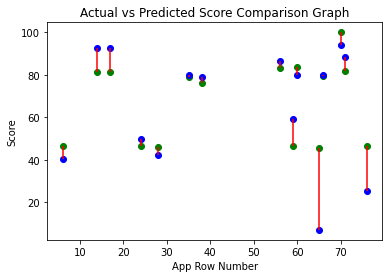

Blue: Predicted, Green: Actual


,App_Title,Actual_Score,Predicted_Score
38,Age of Z Origins:Tower Defense,76.1,79.025337
59,PCH Lotto,46.4,59.167080
66,Hungry Shark Evolution - Offline survival game,79.3,79.691985
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,86.297848
76,free monthly calendar app,46.3,25.428794
65,Clone Evolution: Cyber War-Borderlands Fantasy,45.4,7.063444
14,My Red Lobster Rewards℠,81.2,92.598413
70,OneLogin Protect,100,94.034501
17,"theScore: Live Sports Scores, News, Stats & Vi...",81.2,92.598413
60,Beckett Mobile,83.7,79.800704


In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
y_pred = fit_score_pred(lin_reg)
comparison_plot(y_pred)
comparison_chart(y_pred)


Run on an SVM model
- Played around with some of the hyperparameters since the model was so accurate

Model score (R^2): 0.08433354144028271


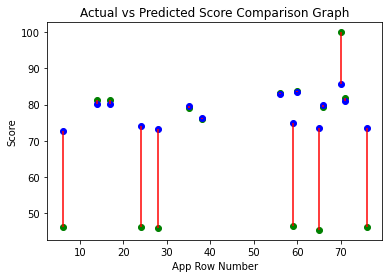

Blue: Predicted, Green: Actual


,App_Title,Actual_Score,Predicted_Score
38,Age of Z Origins:Tower Defense,76.1,76.329020
59,PCH Lotto,46.4,75.008803
66,Hungry Shark Evolution - Offline survival game,79.3,80.003323
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,82.963326
76,free monthly calendar app,46.3,73.566174
65,Clone Evolution: Cyber War-Borderlands Fantasy,45.4,73.646660
14,My Red Lobster Rewards℠,81.2,80.163895
70,OneLogin Protect,100,85.696540
17,"theScore: Live Sports Scores, News, Stats & Vi...",81.2,80.163895
60,Beckett Mobile,83.7,83.600530


In [13]:
from sklearn.svm import SVR
svr = SVR()
y_pred = fit_score_pred(svr)
comparison_plot(y_pred)
comparison_chart(y_pred)


Run on a Random Forest model

Model score (R^2): 0.8791773209106234


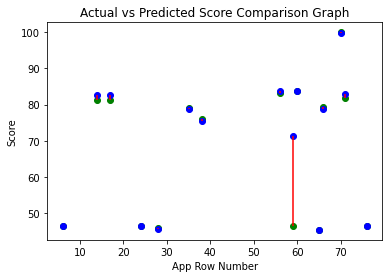

Blue: Predicted, Green: Actual


,App_Title,Actual_Score,Predicted_Score
38,Age of Z Origins:Tower Defense,76.1,75.360
59,PCH Lotto,46.4,71.400
66,Hungry Shark Evolution - Offline survival game,79.3,78.862
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,83.760
76,free monthly calendar app,46.3,46.288
65,Clone Evolution: Cyber War-Borderlands Fantasy,45.4,45.305
14,My Red Lobster Rewards℠,81.2,82.537
70,OneLogin Protect,100,99.786
17,"theScore: Live Sports Scores, News, Stats & Vi...",81.2,82.537
60,Beckett Mobile,83.7,83.700


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
y_pred = fit_score_pred(rfr)
comparison_plot(y_pred)
comparison_chart(y_pred)


Run on a Gradient Boost Regressor model

Model score (R^2): 0.9514795085299379


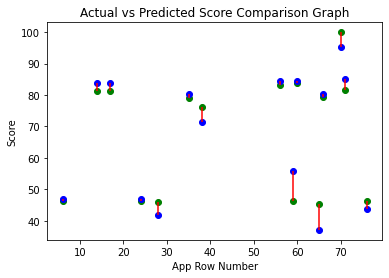

Blue: Predicted, Green: Actual


,App_Title,Actual_Score,Predicted_Score
38,Age of Z Origins:Tower Defense,76.1,71.491739
59,PCH Lotto,46.4,55.786915
66,Hungry Shark Evolution - Offline survival game,79.3,80.269974
56,"Poster Maker, Flyers, Banner, Logo Ads Page De...",83.1,84.379030
76,free monthly calendar app,46.3,43.699788
65,Clone Evolution: Cyber War-Borderlands Fantasy,45.4,37.063283
14,My Red Lobster Rewards℠,81.2,83.896210
70,OneLogin Protect,100,95.415922
17,"theScore: Live Sports Scores, News, Stats & Vi...",81.2,83.896210
60,Beckett Mobile,83.7,84.379030


In [15]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
y_pred = fit_score_pred(gbr)
comparison_plot(y_pred)
comparison_chart(y_pred)


### 4. Select best results and view feature importance

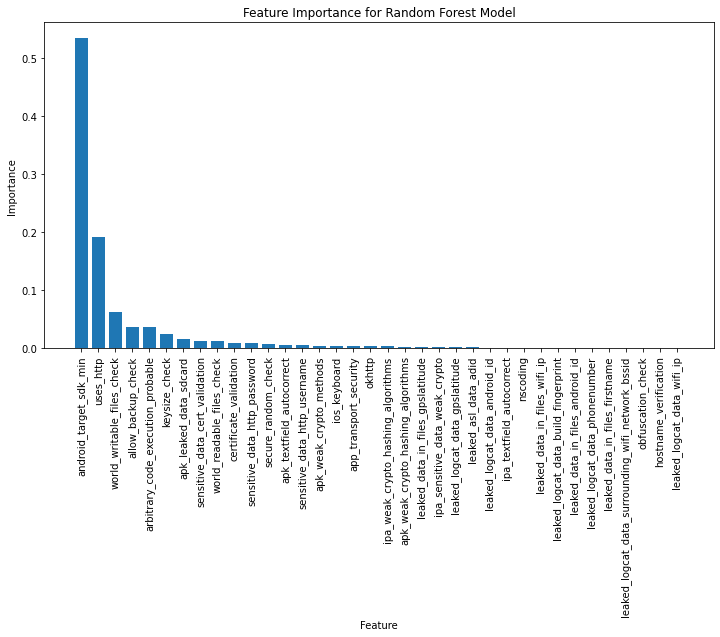

In [16]:
# Get the feature importances from the Random Forest model
feature_importances = rfr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance plot
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Random Forest Model')
plt.show()

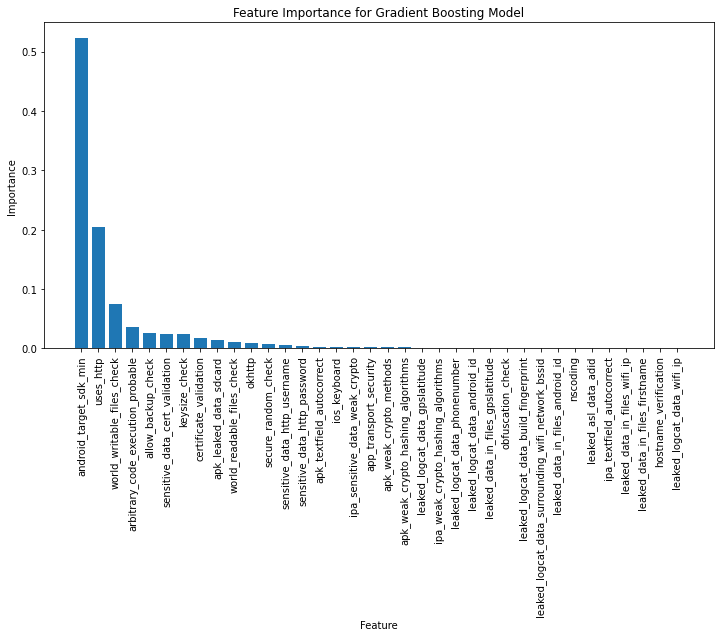

In [17]:
# Get the feature importances from the Gradient Boosting model
feature_importances = gbr.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance plot
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance for Gradient Boosting Model')
plt.show()